In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
depths = list(range(3,11))
branching_factors = list(range(2,5))

results = np.zeros((len(depths), len(branching_factors), 4))

In [22]:
for d_idx, d in enumerate(depths):
    results[d_idx] = np.load('src/tree_depth{}.npy'.format(d))

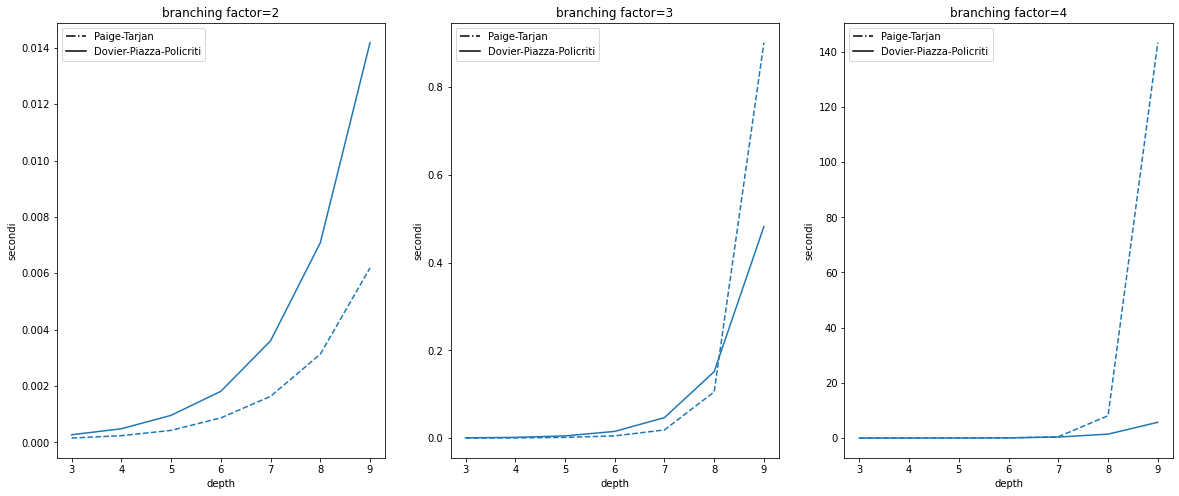

In [5]:
from matplotlib.lines import Line2D

plt.figure(figsize=(20,8))

for r_idx,r in enumerate(branching_factors):
    plt.subplot(1,3,r_idx+1)
    p = plt.plot(depths, results[:, r_idx, 0], linestyle='--')
    plt.plot(depths, results[:, r_idx, 1], c=p[0].get_c())

    plt.xticks(depths, depths)
    plt.xlabel('depth')

    plt.ylabel('secondi')

    pta_line = Line2D([0], [0], color='black', linestyle='-.')
    fba_line = Line2D([0], [0], color='black')
    labels = ['Paige-Tarjan', 'Dovier-Piazza-Policriti']
    plt.legend([pta_line, fba_line], labels)

    plt.title('branching factor={}'.format(r))
plt.show()

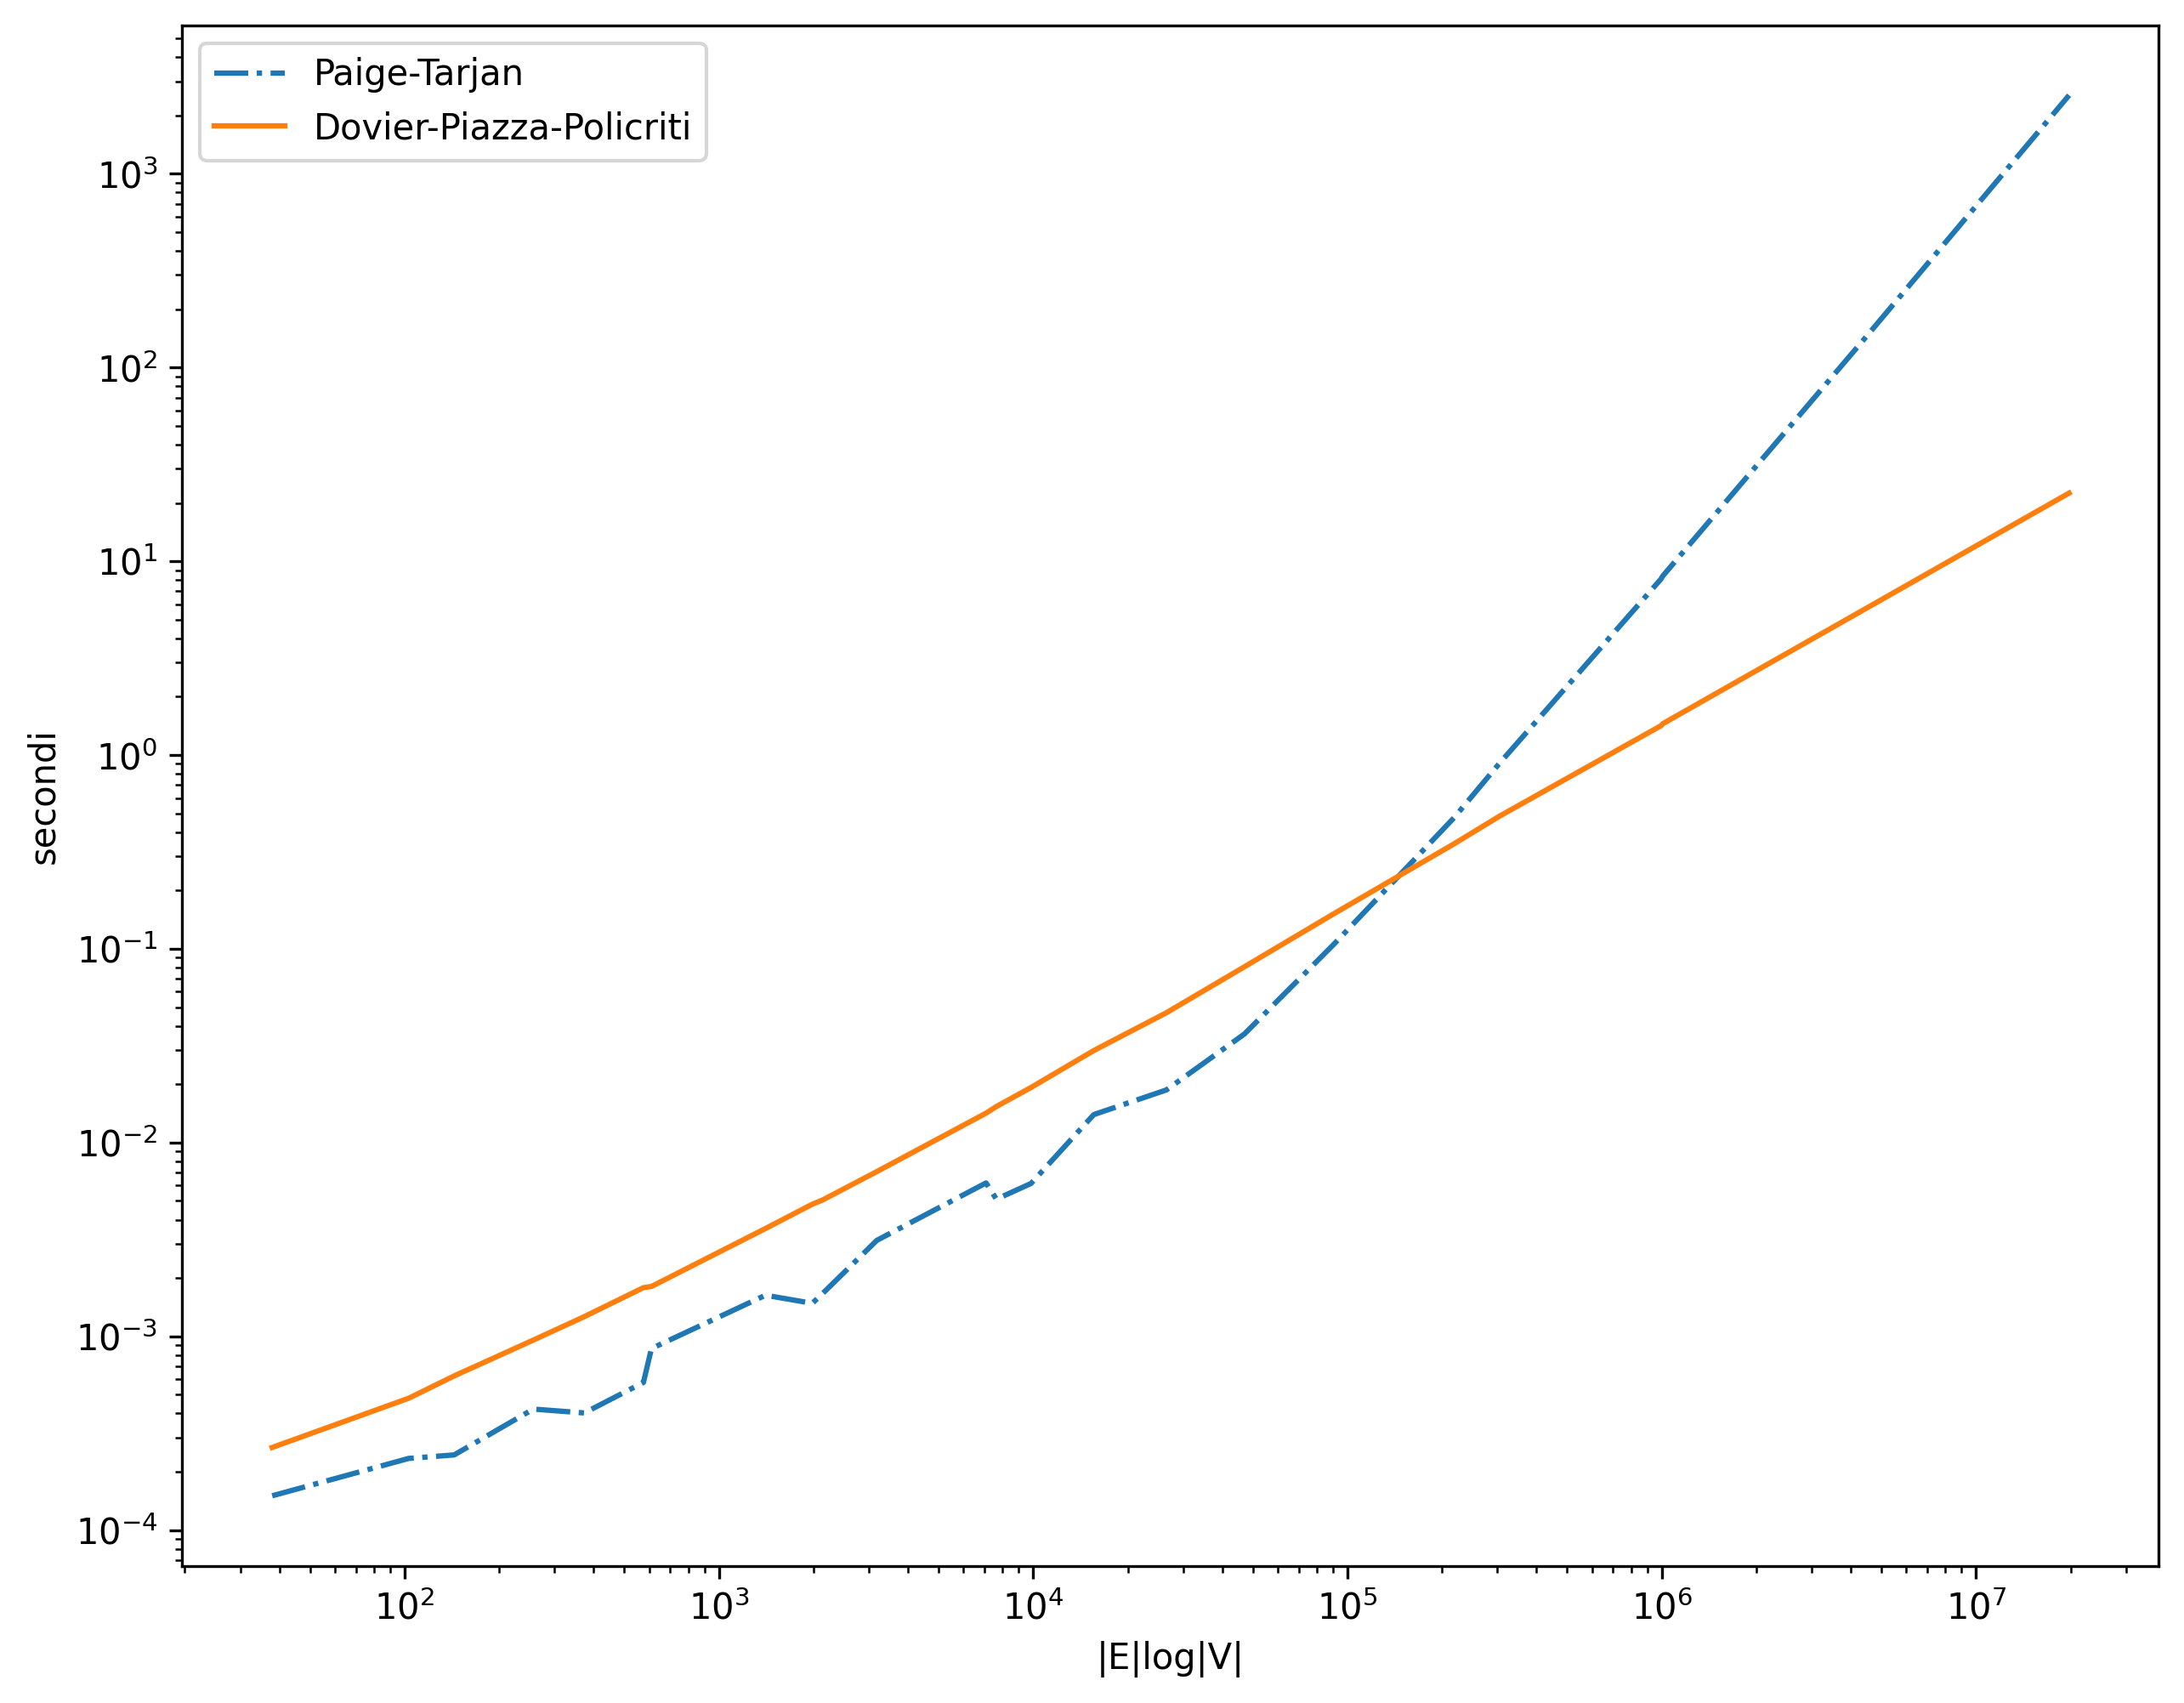

In [33]:
import math

x = []
pta = []
fba = []

for d_idx, d in enumerate(depths):
    for r_idx,r in enumerate(branching_factors):
        x.append(math.log(results[d_idx, r_idx, 2]) * results[d_idx, r_idx, 3])
        pta.append(results[d_idx, r_idx, 0])
        fba.append(results[d_idx, r_idx, 1])
        
x, pta, fba = zip(*sorted(zip(x, pta, fba)))
        
plt.figure(figsize=(10,8), dpi=300)

plt.plot(x, pta, label='Paige-Tarjan', linestyle='-.')
plt.plot(x, fba, label='Dovier-Piazza-Policriti')

plt.xlabel('|E|log|V|')
plt.ylabel('secondi')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.show()